### Importing the needed libraries 

In [6]:
from cuqi.distribution import UserDefinedDistribution
from cuqi.testproblem import Poisson1D
from cuqi.problem import BayesianProblem
import cuqi
import inspect
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from cuqi.sampler import MH, CWMH, ULA, MALA, NUTS

import time

import scipy.stats as sps
from scipy.stats import gaussian_kde
import pandas as pd
import cProfile, pstats, io
from pstats import SortKey
import os
import matplotlib.pyplot as plt
from IPython.display import Image, display
import sys
# Change the current working directory to the root of the project
sys.path.append(os.path.abspath('..'))

# Now you should be able to import the module
from utilities import TableAutomization as TA
from cuqi.distribution import Distribution



# The six modal distribution


The given probability density function is:

$\pi(x,y) \propto \exp\left(-\frac{x^2}{2}\right) \exp\left(\frac{(\csc^5(y) - x)^2}{2}\right) $

 Gradient of the log-pdf


$\nabla \log \pi(x, y) = \left(-\csc^5(y), \; -5 (\csc^5(y) - x) \csc^5(y) \cot(y)\right)$

In [7]:
def zero_fix(x):
    if 0.001 >= x >= 0:
        return 0.001
    if -0.001 <= x < 0:
        return -0.001
    return x


In [8]:


# logpdf = lambda x1, x2:  (- x1**2 +( np.sin(x2)**(-5) - x1)**2)/2


#threshold = lambda x: max(np.abs(np.sin(x[1])),0.001) * (np.positive(np.sin(x[1]))*2 -1)
# logpdf = lambda x:  (- x[0]**2 +((np.sin(x[1]))**(-5) - x[0])**2)/2
logpdf = lambda x:  (- x[0]**2 +(zero_fix(np.sin(x[1]))**(-5) - x[0])**2)/2
gradient_x =  lambda x: np.array(- zero_fix(np.sin(x[1]))**(-5),-5 * zero_fix(np.sin(x[1]))**(-5) - x[0] * zero_fix(np.sin(x[1]))**(-6) * np.cos(x[1]))

target_sixmodal = UserDefinedDistribution(dim=2, logpdf_func=logpdf, gradient_func=gradient_x)

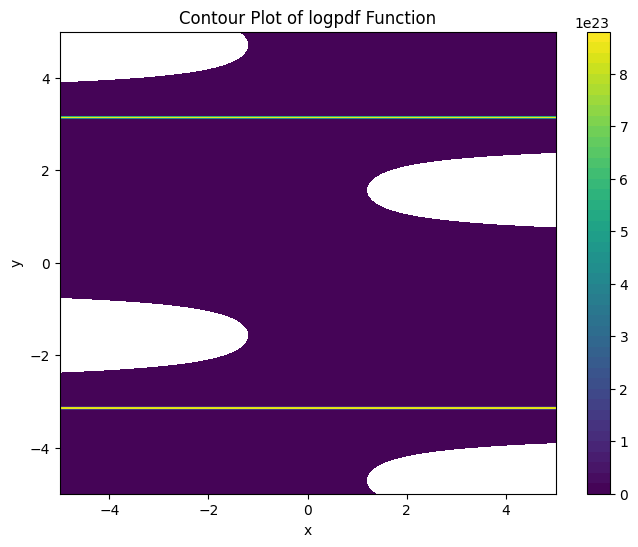

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming zero_fix is defined somewhere, for this example we will just use np.sin directly.
# If zero_fix is different from np.sin, replace np.sin with zero_fix in the following code.
zero_fix = np.sin

# Define the logpdf function
logpdf = lambda x: (np.sin(x)**(-5)**2) / 2

# Create a grid of x and y values
x_values = np.linspace(-5, 5, 400)
y_values = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x_values, y_values)

# Evaluate the logpdf function on the grid
Z = np.array([[logpdf([x, y]) for x, y in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])

# Plotting
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.title("Contour Plot of logpdf Function")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


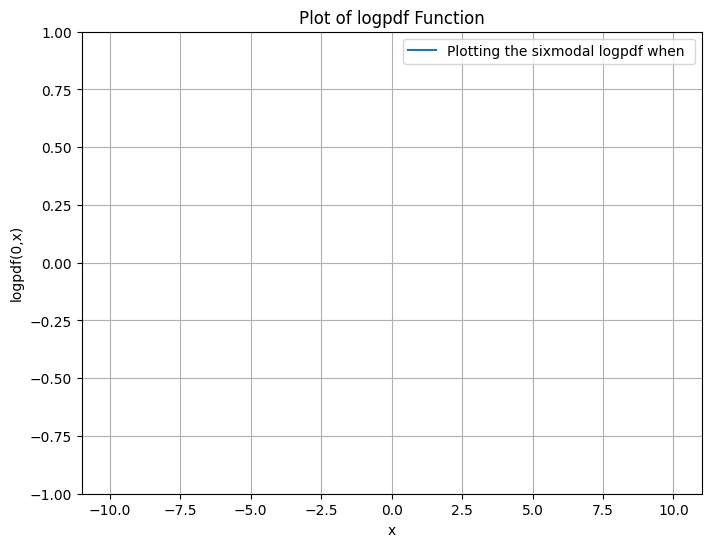

In [6]:

# Create a range of x values
x_values = np.linspace(-10, 10, 1000)

logpdf = lambda x:  (- x[0]**2 +(zero_fix(np.sin(x[1]))**(-5) - x[0])**2)/2
# Evaluate the logpdf function over the range of x values
y_values = logpdf([np.zeros(1000),x_values])

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Plotting the sixmodal logpdf when ')
plt.title("Plot of logpdf Function")
plt.xlabel("x")
plt.ylabel("logpdf(0,x)")
plt.ylim(-1, 1)  # Adjust y-limits for better visualization
plt.grid(True)
plt.legend()
plt.show()

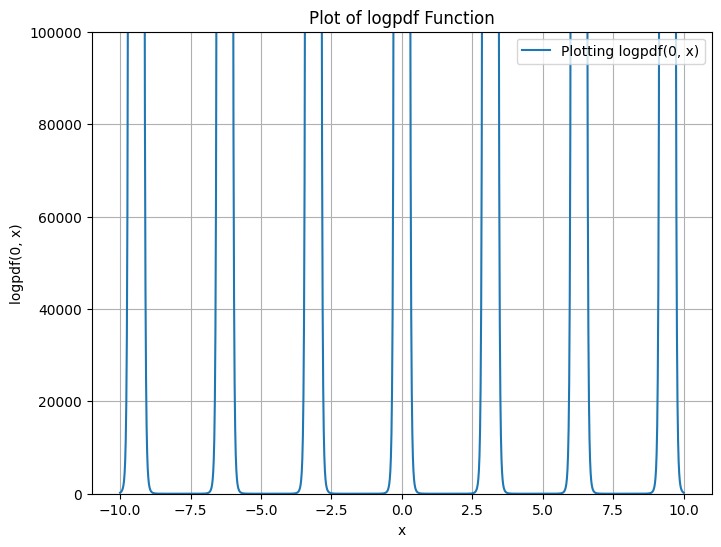

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming zero_fix is defined
# zero_fix = np.sin  # or any other function you use for zero_fix

# Define the complex logpdf function
logpdf = lambda x: (- x[0]**2 + (np.sin(x[1])**(-5) - x[0])**2)/2

# Create a range of x values for x[1]
x_values = np.linspace(-10, 10, 1000)

# Evaluate the logpdf function over the range of x values, fixing x[0] to 0
y_values = logpdf([np.zeros(1000), x_values])

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Plotting logpdf(0, x)')
plt.title("Plot of logpdf Function")
plt.xlabel("x")
plt.ylabel("logpdf(0, x)")
plt.ylim(-1, 100000)  # Adjust y-limits for better visualization
plt.grid(True)
plt.legend()
plt.show()


### Plotting the "sixmodal"

/Users/naoki/Desktop/CUQIpy_project/CUQIpy-Benchmarks/utilities/TableAutomization.py:279: RuntimeWarning: overflow encountered in exp
  distb_pdf[ii,jj] = np.exp(distb.logd(np.array([grid1[ii,jj], grid2[ii,jj]])))
/Users/naoki/miniconda3/envs/cuqipy/lib/python3.12/site-packages/matplotlib/image.py:463: RuntimeWarning: overflow encountered in scalar multiply
  newmin = vmid - dv * fact
/Users/naoki/miniconda3/envs/cuqipy/lib/python3.12/site-packages/matplotlib/image.py:468: RuntimeWarning: overflow encountered in scalar multiply
  newmax = vmid + dv * fact


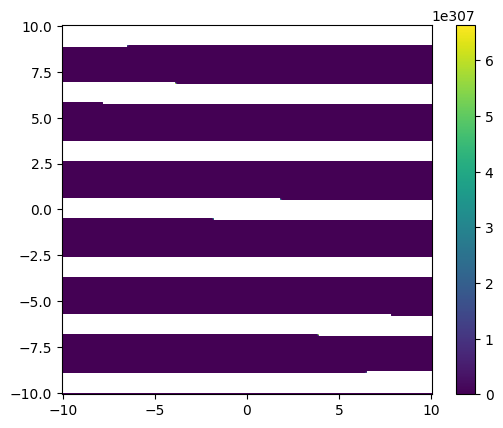

In [9]:
TA.plot_pdf_2D(target_sixmodal, -10, 10, -10, 10, N2=201)

logscale graph

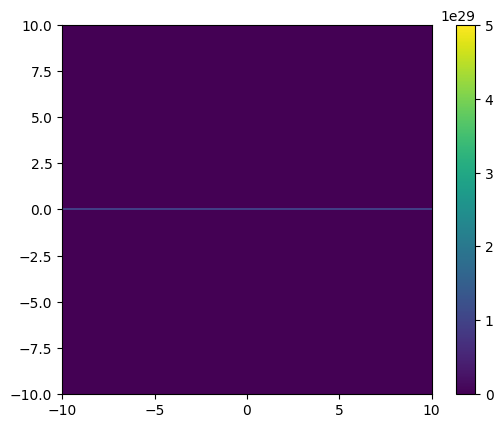

In [5]:
TA.plot_pdf_2D(target_sixmodal, -10, 10, -10, 10,N2=1001)

In [6]:
#exponential distribution
# logpdf =  lambda x:  (- x[0] - x[1])
# gradient_x =  lambda x: np.array([-1, -1])
# target_sum = UserDefinedDistribution(dim=2, logpdf_func=logpdf, gradient_func=gradient_x)

## Example 



In this example, we sample x0 from an initial dstribution, and we use the sam enumber of samples, burnins and the same scale for each method: 
- scale = 0.05
- Ns = 8500
- Nb = 1500

- Compute sampling methods

In [10]:
true_mu = np.array([0, 0])
true_sigma = np.array([1,1])
y = cuqi.distribution.Gaussian(mean=true_mu, cov=true_sigma**2)

In [12]:
df, (fig, axs) = TA.create_comparison(target_sixmodal, 0.05, 850, 150, x0 = y, seed = 12,chains=3)

Sample 1000 / 1000

Average acceptance rate: 0.007058823529411765 

Sample 1000 / 1000

Average acceptance rate: 0.01647058823529412 MCMC scale: 0.016433215341738652 

Sample 1000 / 1000
Sample 1000 / 1000
Sample 1000 / 1000


/Users/naoki/Desktop/CUQIpy_project/CUQIpy-Benchmarks/utilities/TableAutomization.py:279: RuntimeWarning: overflow encountered in exp
  distb_pdf[ii,jj] = np.exp(distb.logd(np.array([grid1[ii,jj], grid2[ii,jj]])))
/Users/naoki/miniconda3/envs/cuqipy/lib/python3.12/site-packages/matplotlib/colorbar.py:1098: RuntimeWarning: overflow encountered in add
  self._values = 0.5 * (self._boundaries[:-1] + self._boundaries[1:])
/Users/naoki/miniconda3/envs/cuqipy/lib/python3.12/site-packages/matplotlib/ticker.py:2119: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
/Users/naoki/miniconda3/envs/cuqipy/lib/python3.12/site-packages/matplotlib/ticker.py:755: RuntimeWarning: overflow encountered in scalar power
  if abs_min // 10 ** oom != abs_max // 10 ** oom)
/Users/naoki/miniconda3/envs/cuqipy/lib/python3.12/site-packages/matplotlib/ticker.py:756: RuntimeWarning: overflow encountered in scalar power
  if (abs_max - abs_min) / 10 ** oom <= 1e-2:
/Users/naoki/

Sample 1000 / 1000

Average acceptance rate: 0.007058823529411765 

Sample 1000 / 1000

Average acceptance rate: 0.01647058823529412 MCMC scale: 0.016433215341738652 

Sample 1000 / 1000
Sample 1000 / 1000
Sample 1000 / 1000
Sample 1000 / 1000

Average acceptance rate: 0.007058823529411765 

Sample 1000 / 1000

Average acceptance rate: 0.01647058823529412 MCMC scale: 0.016433215341738652 

Sample 1000 / 1000
Sample 1000 / 1000
Sample 1000 / 1000


/Users/naoki/miniconda3/envs/cuqipy/lib/python3.12/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


- Print table

In [13]:
TA.print_table(df)

+------------+---------+----------+-------+---------+---------+-------+----------+----------+--------+----------+
|   Method   | Samples | Burn-ins | Scale | ESS(v0) | ESS(v1) |   AR  | Rhat(v0) | Rhat(v1) | LogPDF | Gradient |
+------------+---------+----------+-------+---------+---------+-------+----------+----------+--------+----------+
|  MH_fixed  |   850   |   150    |  0.05 |  9.112  |  15.057 | 0.007 |  1.157   |  1.206   |  1000  |    0     |
| MH_adapted |   850   |   150    |  0.05 |  2.395  |  17.966 | 0.016 |  1.271   |  1.014   |  1000  |    0     |
|    ULA     |   850   |   150    |  0.05 |   13.8  |  13.624 |  1.0  |  1.352   |  1.351   |  1000  |   1000   |
|    MALA    |   850   |   150    |  0.05 |  850.0  |  850.0  |  0.0  |    -     |    -     |  1000  |   1000   |
|    NUTS    |   850   |   150    |  0.05 |  850.0  |  850.0  | 0.001 |    -     |    -     |  1019  |   1019   |
+------------+---------+----------+-------+---------+---------+-------+----------+------

Observations:
- Every sampleing method stuck in high density areas so acceptance rates are very low and some of them.
- MALA and NUTS did not even move after one step.
-  ESS of MALA and NUTS are weird.
- Rhat was not calculated for MALA and NUTS.
- We had lots of overflow.

- Create distribution images  

/Users/naoki/miniconda3/envs/cuqipy/lib/python3.12/site-packages/matplotlib/image.py:463: RuntimeWarning: overflow encountered in scalar multiply
  newmin = vmid - dv * fact
/Users/naoki/miniconda3/envs/cuqipy/lib/python3.12/site-packages/matplotlib/image.py:468: RuntimeWarning: overflow encountered in scalar multiply
  newmax = vmid + dv * fact


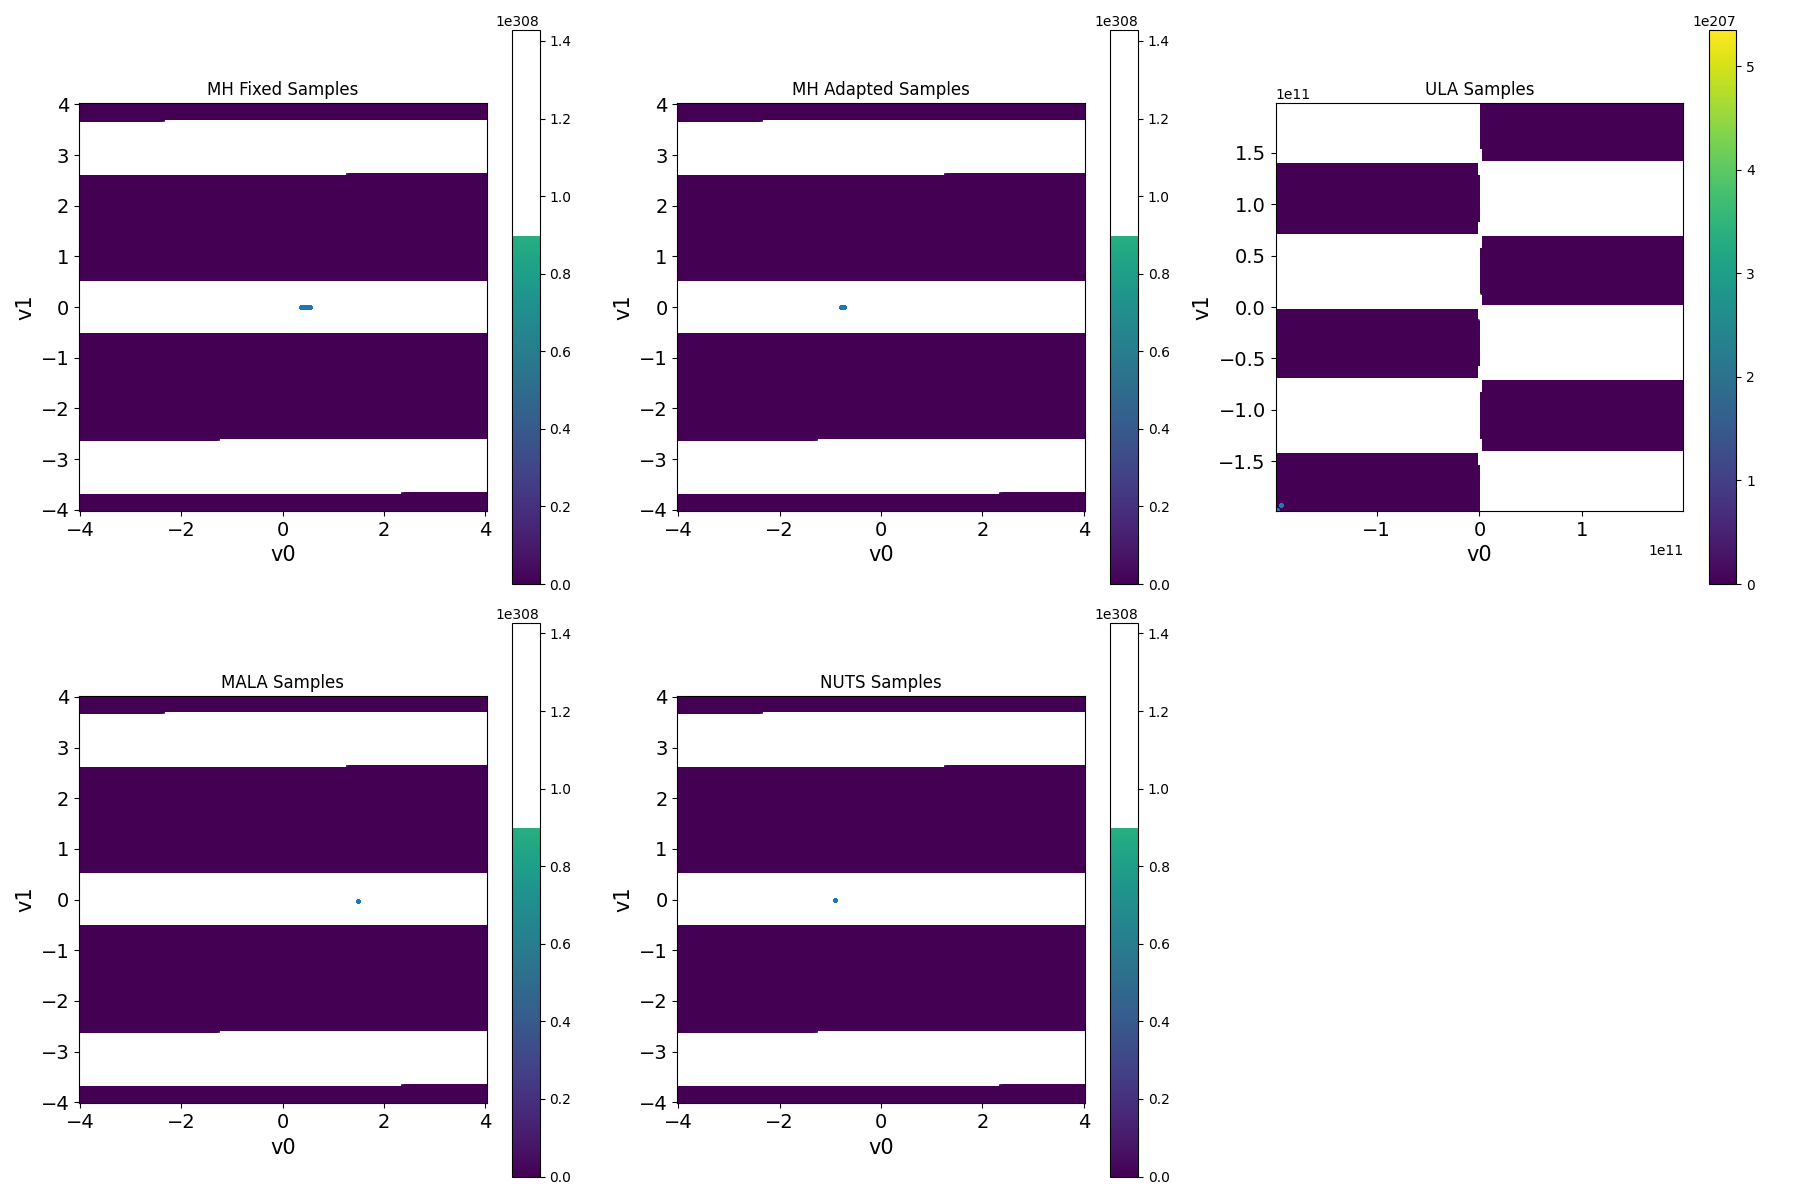

In [14]:
TA.show_plot(fig)

_Observations_
- ULA's background plot which is not related to sampling changed somehow.